## Importing the libraries

In [33]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import time

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import data_acquisition as da
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

## Getting the training and testing data

In [34]:
# Importing the data through the data_acquisition file
xdat, ydat = da.labels_binary('./dataset')
# Normalizing the data
x = np.array(xdat)
y = np.array(ydat)
x /= 255
# Converting the 3 dimensional features to one dimension
for i in range(x.shape[0]):
    x[i] = np.reshape(x[i], (512, 512, 1))

In [35]:
# Splitting the data onto a test and a train set
xtrain, xval, ytrain, yval = train_test_split(x, y, train_size=0.85, random_state=15) 

In [36]:
xtrain.shape

(2550, 512, 512, 1)

## Implementing CNN algorithm from the keras library

In [37]:
# Creating the CNN Model with 3 convolutional layers and pooling layers in between
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(512,512,1)))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [38]:
# Getting the summary of the created CNN model
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 510, 510, 32)      320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 508, 508, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 254, 254, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 254, 254, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 126, 126, 64)     

In [39]:
# Predicting the outputs using CNN
start_time = time.time()
final_model = cnn_model.fit(xtrain, ytrain, batch_size=10, epochs=10, validation_data=(xval, yval))
classifier1_time = time.time() - start_time
print("Training time is: %s seconds" % (classifier1_time))

Train on 2550 samples, validate on 450 samples
Epoch 1/10
2550/2550 [==============================] - 57s 22ms/step - loss: 0.4663 - accuracy: 0.8443 - val_loss: 0.2765 - val_accuracy: 0.8956
Epoch 2/10
2550/2550 [==============================] - 55s 22ms/step - loss: 0.2686 - accuracy: 0.8749 - val_loss: 0.1956 - val_accuracy: 0.9111
Epoch 3/10
2550/2550 [==============================] - 55s 22ms/step - loss: 0.2192 - accuracy: 0.9059 - val_loss: 0.2451 - val_accuracy: 0.8956
Epoch 4/10
2550/2550 [==============================] - 55s 21ms/step - loss: 0.1679 - accuracy: 0.9271 - val_loss: 0.1465 - val_accuracy: 0.9444
Epoch 5/10
2550/2550 [==============================] - 57s 23ms/step - loss: 0.1200 - accuracy: 0.9498 - val_loss: 0.1425 - val_accuracy: 0.9444
Epoch 6/10
2550/2550 [==============================] - 54s 21ms/step - loss: 0.0863 - accuracy: 0.9675 - val_loss: 0.1731 - val_accuracy: 0.9467
Epoch 7/10
2550/2550 [==============================] - 53s 21ms/step - loss:

In [40]:
y_pred_train1 = cnn_model.predict_classes(xtrain)
y_pred_val1 = cnn_model.predict_classes(xval)

## Getting accuracy results

The accuracy of the train set: 
0.9929411764705882
The accuracy of the validation set: 
0.9622222222222222
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.96      0.77      0.85        65
       tumor       0.96      0.99      0.98       385

    accuracy                           0.96       450
   macro avg       0.96      0.88      0.92       450
weighted avg       0.96      0.96      0.96       450

The confusion matrix: 


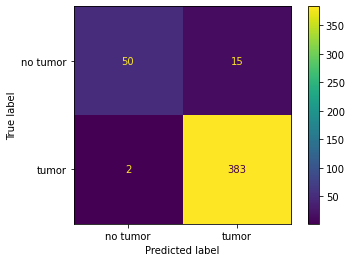

In [41]:
#print(accuracy_score(ytest, final_model))
#y_val_pred = cnn_model.predict_classes(xval)
#print(accuracy_score(yval, y_val_pred))
print('The accuracy of the train set: ')
print(accuracy_score(ytrain, y_pred_train1))
print('The accuracy of the validation set: ')
print(accuracy_score(yval, y_pred_val1))

print('The classification report: ')
print(classification_report(yval, y_pred_val1, target_names=['no tumor', 'tumor']))

print('The confusion matrix: ')
conf_mat1 = confusion_matrix(yval, y_pred_val1, labels=[0, 1])
cm_disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1, display_labels=['no tumor', 'tumor'])
cm_disp1.plot()

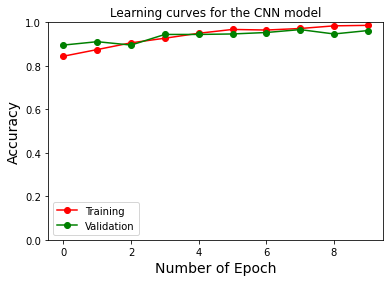

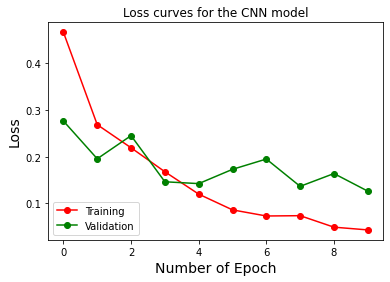

In [44]:
plt.plot(final_model.history['accuracy'], 'o-', color="r", label = 'Training error')
plt.plot(final_model.history['val_accuracy'], 'o-', color="g", label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Number of Epoch', fontsize = 14)
plt.ylim((0,1))
plt.title('Learning curves for the CNN model')
plt.legend(['Training', 'Validation'], loc='lower left')
plt.show()

plt.plot(final_model.history['loss'], 'o-', color="r", label = 'Training')
plt.plot(final_model.history['val_loss'], 'o-', color="g", label = 'Validation')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Number of Epoch', fontsize = 14)
plt.legend(['Training', 'Validation'], loc='lower left')
plt.title('Loss curves for the CNN model')
plt.show()

# Testing the Model with the Test Data

In [45]:
# Importing the data through the data_acquisition file
x2dat, y2dat = da.labels_binary('./test')
x2 = np.array(x2dat)
y2 = np.array(y2dat)
# Normalizing the data
x2 /= 255
# Converting the 3 dimensional features to one dimension
for i in range(x2.shape[0]):
    x2[i] = np.reshape(x2[i], (512, 512, 1))

In [46]:
y2_test_pred = cnn_model.predict_classes(x2)

The accuracy of the test set: 
0.97
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.97      0.86      0.91        37
       tumor       0.97      0.99      0.98       163

    accuracy                           0.97       200
   macro avg       0.97      0.93      0.95       200
weighted avg       0.97      0.97      0.97       200

The confusion matrix: 


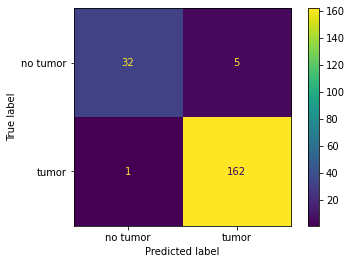

In [47]:
print('The accuracy of the test set: ')
print(accuracy_score(y2, y2_test_pred))

print('The classification report: ')
print(classification_report(y2, y2_test_pred, target_names=['no tumor', 'tumor']))

print('The confusion matrix: ')
conf_mat1 = confusion_matrix(y2, y2_test_pred, labels=[0, 1])
cm_disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1, display_labels=['no tumor', 'tumor'])
cm_disp1.plot()